# 1. We start to analyse the data set using some command line commands the data folder is on the same folder level of this notebook 


In [1]:
#lets see what are the files we are going to work with
!ls -d 2018J_TMA02_data/street-crimes/*/*

2018J_TMA02_data/street-crimes/2017-06/2017-06-avon-and-somerset-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-bedfordshire-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-btp-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-cambridgeshire-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-cheshire-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-city-of-london-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-cleveland-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-cumbria-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-derbyshire-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-devon-and-cornwall-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-dorset-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-durham-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-dyfed-powys-street.csv
2018J_TMA02_data/street-crimes/2017-06/2017-06-essex-street.csv
2018J_TMA02_data/street-crimes/201

In [2]:
#it shows the total files number
!ls 2018J_TMA02_data/street-crimes/*/* | wc -l
#it shows the lines of a random file so that we can have an idea on the file size
!wc -l 2018J_TMA02_data/street-crimes/2017-07/2017-07-avon-and-somerset-street.csv 
#it shows the head of one of the files
!head  2018J_TMA02_data/street-crimes/2018-01/2018-01-avon-and-somerset-street.csv


537
17127 2018J_TMA02_data/street-crimes/2017-07/2017-07-avon-and-somerset-street.csv
Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
4b89599348c51bcc80abf2fab1e55537b9f5473e9cd654259681be101beda819,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,E01021311,Basildon 022C,Other crime,Investigation complete; no suspect identified,
,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,,
74128ab275c1aa107d67cd59d1d3210bd9fdc976e0c2c6b6aad058a9ef3f4e8d,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Burglary,Under investigation,
0417b3f4363b480f4d4c2a826be8cd4a957fffb818873e73bf3662698e2d734c,2018-01,Avon and Somerset Con

In [3]:
# This cell imports some libraries we need to work with the data

import pandas as pd
import numpy as np
import re
import glob, os
from numpy import nan as NA
import matplotlib.pyplot as plt

Due to the volume of the files we will start analysing only one folder to get an idea of the data. We will save the data in a pandas dataframe  

In [4]:
# we import the csv files contained in 2017-06 to start our analisys *method from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

path = r'2018J_TMA02_data/street-crimes/2017-06/'
all_files = glob.glob(path + "/*.csv")
df_from_each_file = (pd.read_csv(f) for f in all_files)

crime062017_df   = pd.concat(df_from_each_file, ignore_index=True)


In [5]:
#it shows the DF head
crime062017_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2017-06,City of London Police,City of London Police,-0.114954,51.518632,On or near Brownlow Street,E01000914,Camden 028B,Anti-social behaviour,NaN,NaN
1,NaN,2017-06,City of London Police,City of London Police,-0.114954,51.518632,On or near Brownlow Street,E01000914,Camden 028B,Anti-social behaviour,NaN,NaN
2,709b0e810cb5ecceafca663e4172f2deaa465869172480...,2017-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN
3,78fb1cafcc98745d28704a80a96276b22c2553dedca9d3...,2017-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Robbery,Investigation complete; no suspect identified,NaN
4,NaN,2017-06,City of London Police,City of London Police,-0.095914,51.520348,On or near Beech Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


In [6]:
#we explore with describe the DF subset
crime062017_df.describe()


,Longitude,Latitude,Context
count,564856.0000000,564856.0000000,0.0
mean,-1.4087456,52.4710901,NaN
std,1.4638234,1.1918892,NaN
min,-8.0954690,-4.7878250,NaN
25%,-2.2306795,51.5021035,NaN
50%,-1.3897250,52.2980145,NaN
75%,-0.2086115,53.4679142,NaN
max,54.4138680,57.5515000,NaN


In [44]:
#crime062017_df.dtypes


'Anti-social behaviour'

we can notice that the only numbers are latitude and longitude, and context colums. The Month is read as object as the other values. As we are working on a single month we don't need to change those types at the moment.  

## for our analysis we will start to create a subset  colums

In [64]:
#we create a df with the police force as index and the type of crimes as columns so that we can have an idea of
# the number of the type of crime we encounter during thi month, we use margin all so that we can have an idea of the
# total number of crimes
location_tab_df=pd.crosstab(crime062017_df['Reported by'], crime062017_df['Crime type'])
crosstab_df = pd.crosstab(crime062017_df['Reported by'],crime062017_df['Crime type'], margins=True, margins_name='Total')
test = pd.crosstab(crime062017_df['Crime type'], crime062017_df['Reported by'])

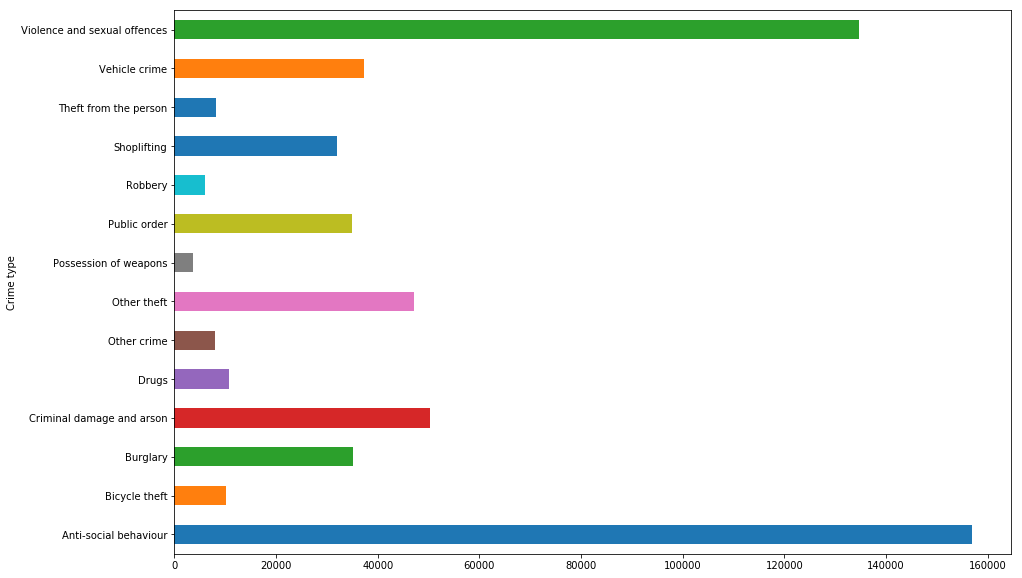

In [82]:
#test.agg(sum).plot.bar(figsize=(15,10))
location_tab_df.agg(sum).plot.barh(figsize=(15,10))

In [22]:
crime_tab_df = crime062017_df['Crime type'].count()
crime_tab_df

574810

Text(0,0.5,'Number of crimes')

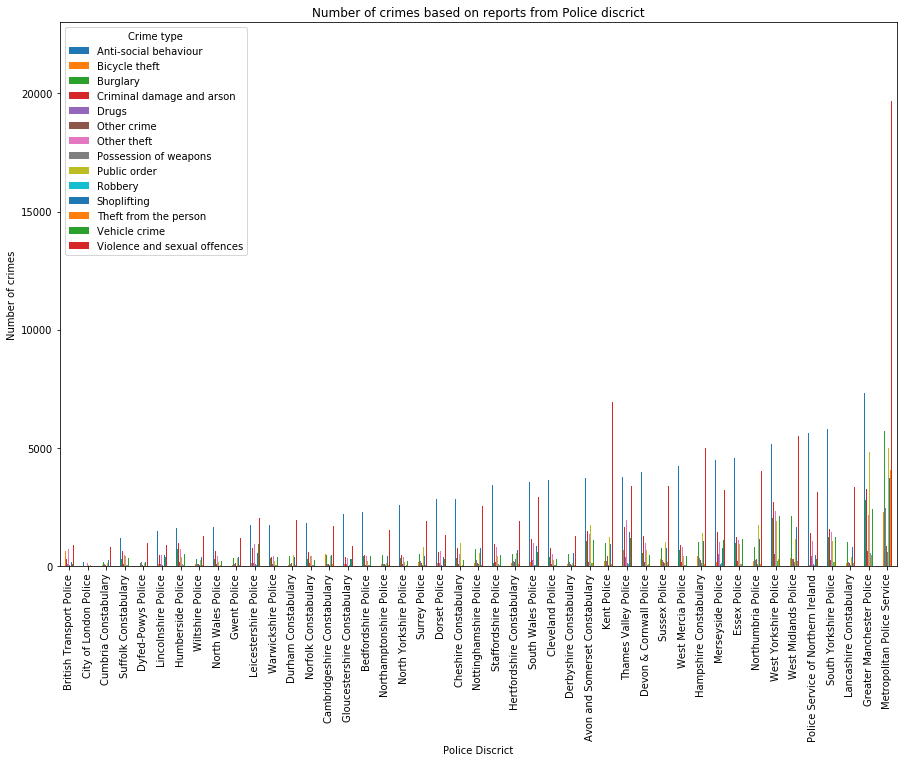

In [40]:
location_tab_df.sort_values(by=['Anti-social behaviour']).plot.bar(title='Number of crimes based on reports from Police discrict', ylim=(0, 23000), figsize=(15,10))
plt.xlabel('Police Discrict')
plt.ylabel('Number of crimes')


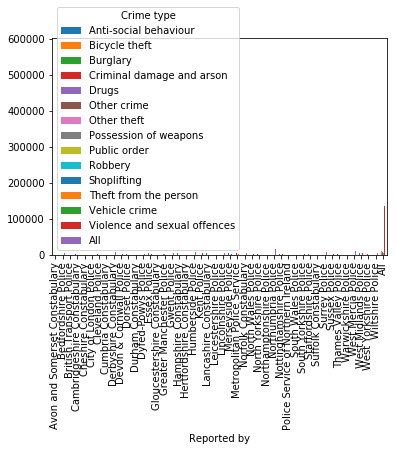

In [42]:
location_tab_df.plot.bar()

In [28]:
#crime_tab_df
#test.plot(title='A test on line plot')
crime_tab_df = pd.crosstab(crime062017_df['Crime type'],crime062017_df['Reported by'], margins=True)

In [99]:
crime062017_df.pivot_table(index='Reported by')

,Latitude,Longitude
Reported by,,
Avon and Somerset Constabulary,51.3366399,-2.6749870
Bedfordshire Police,51.9799799,-0.4560284
British Transport Police,51.9127513,-0.6592404
Cambridgeshire Constabulary,52.4074503,-0.0546455
Cheshire Constabulary,53.2678640,-2.5840295
City of London Police,51.5150313,-0.0893844
Cleveland Police,54.5866511,-1.2217390
Cumbria Constabulary,54.5681236,-3.1262556
Derbyshire Constabulary,53.0353784,-1.4639558


In [89]:
crime_tab_df.plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'